## Credit Grant Analysis

Abstract: Construction of a Machine Learning Model to identify possible non-payers, reducing the risk in granting credit

### 1. Setup


**1.1 Importing Libraries**

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

**1.2 Loading the Databases**

In [234]:

df_application = pd.read_csv('application_record.csv')
df_credit = pd.read_csv('credit_record.csv')


### 2. Database analysis and initial treatments

**2.1 Analysis of the Bases**

In [235]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [236]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [237]:
df_application.shape

(438557, 18)

In [238]:
df_credit.shape

(1048575, 3)

In [239]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [240]:
df_application.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [241]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [242]:
df_credit.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


**2.2 Null Data Treatment**

Analyzing details of the lines with missing data (missing) of the DF_APPLICATION dataframe, it is possible to observe that the variable **OCCUPATION_TYPE** has missing data in some lines.

In [243]:
df_credit.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [244]:
df_application.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [245]:
df_missing_occupation = df_application[df_application['OCCUPATION_TYPE'].isnull()]

In [246]:
print(f"DF_APPLICATION - Total de linhas com dados nulos: {df_missing_occupation.count()[1]}")

DF_APPLICATION - Total de linhas com dados nulos: 134203


In [247]:
df_missing_occupation.groupby("NAME_INCOME_TYPE")["NAME_INCOME_TYPE"].count().sort_values(ascending=False)

NAME_INCOME_TYPE
Pensioner               75357
Working                 35886
Commercial associate    16745
State servant            6210
Student                     5
Name: NAME_INCOME_TYPE, dtype: int64

In [248]:
df_missing_occupation.groupby("NAME_EDUCATION_TYPE")["NAME_EDUCATION_TYPE"].count().sort_values(ascending=False)

NAME_EDUCATION_TYPE
Secondary / secondary special    97029
Higher education                 31859
Incomplete higher                 3216
Lower secondary                   2012
Academic degree                     87
Name: NAME_EDUCATION_TYPE, dtype: int64

As void records represent a good part of the total and, since 72% of these void records point to people with secondary education and 56% to pensioners, we decided to keep the records and fill in the field with the information "Undefined" to later assess whether these data can be useful for the model.

In [249]:
df_application['OCCUPATION_TYPE'] = df_application['OCCUPATION_TYPE'].replace(np.nan, 'Indefinido')

In [250]:
df_application.groupby("OCCUPATION_TYPE")["OCCUPATION_TYPE"].count().sort_values(ascending=False)

OCCUPATION_TYPE
Indefinido               134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64


**2.3 Merge of Bases**

In [251]:
df_app_cred = pd.merge(df_application, df_credit, on='ID')

**2.3.1 Analyzing Result**<br>
As the number of records resulting from the join increased, it is possible to observe the occurrence of a Cartesian product.<br>

In [252]:
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [253]:
print(f"Quantidade de ID's Distintos : {df_app_cred['ID'].nunique()}")

Quantidade de ID's Distintos : 36457



**2.3.2 Removal of Duplicates**

The bases were unified by the ID column of both, in order to deal with the same customers, and only the last (most current) record of each IDs was considered

In [254]:
print('Total de Registros:',df_app_cred['ID'].count())
print('Total de IDs:',df_app_cred['ID'].nunique())

Total de Registros: 777715
Total de IDs: 36457



**2.4 Status Analysis (Label)**


**2.4.1 Status Distribution**

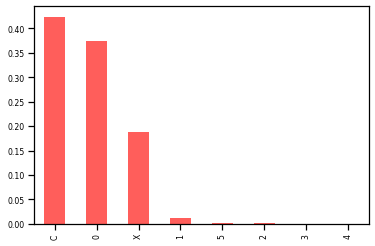

In [255]:
(df_app_cred['STATUS'].value_counts(normalize=True)).plot(kind='bar');

Knowing that for the definition of the target, we will consolidate the statuses C, X and 0 in the value 0 and the statuses 1, 2, 3, 4 and 5 in the value 1, we reproduce the analysis considering this grouping of Status.

In [256]:
df_analise = df_app_cred

df_analise['STATUS'].replace('X', 0, inplace=True)
df_analise['STATUS'].replace('C', 0, inplace=True)
df_analise['STATUS'] = df_analise['STATUS'].astype(int)
df_analise.loc[df_analise['STATUS']>=1,'STATUS']=1


**2.4.2 Qty. Records by Future Status**

In [257]:
df_analise['STATUS'].value_counts()

0    766140
1     11575
Name: STATUS, dtype: int64


**Distribution of the future status that will be the target of the model**

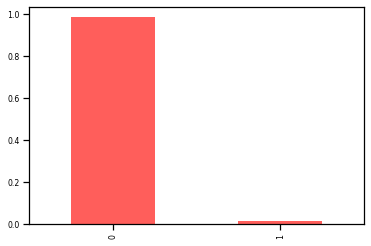

In [258]:
(df_analise['STATUS'].value_counts(normalize=True)).plot(kind='bar');


As shown below, 4,290 IDs (13% of the total of 36,457 IDs) have a status change in history

In [259]:
countd_id = df_analise.groupby('ID').STATUS.nunique()
countd_id.to_frame().groupby('STATUS').STATUS.count().sort_values(ascending=False)

STATUS
1    32167
2     4290
Name: STATUS, dtype: int64


Survey of Total Distinguished IDs for "Status = 1" (Payments more than 30 days late)

In [260]:
df_analise.query('STATUS == 1').agg(['nunique'])["ID"]

nunique    4291
Name: ID, dtype: int64

In [261]:
df_analise.groupby('STATUS').agg(['nunique'])["ID"]

,nunique
STATUS,
0,36456
1,4291


**2.4.3 Impact analysis on the number of records with "Status = 1" using the last Status aggregated by ID.**

In [262]:
df_credit_agrup = df_analise.groupby('ID').agg(max).reset_index()

**Conclusion:** As noted below, after treatment, the number of IDs with "Status = 1" remained. In this way, we can see that the history indicates in the most current ID status record consumers with payments over 30 days late. Therefore, we conclude that the treatment is valid and will be applied in the next steps.

In [263]:
df_credit_agrup.groupby('STATUS').agg(['nunique'])["ID"]

,nunique
STATUS,
0,32166
1,4291


**Solution for Cartesian product (duplicate IDs):**
As shown below, to obtain a total of 36,457 unique IDs, we will exclude the duplicates keeping the last record in the DF_CREDIT dataframe and generate the result again. Thus, our criterion was to consider the most up-to-date information.

In [264]:
df_credit_agrupado = df_credit.groupby('ID').agg(max).reset_index()
df_credit_agrupado.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001712,0,C
2,5001713,0,X
3,5001714,0,X
4,5001715,0,X


In [265]:
df_credit_agrupado.count()

ID                45985
MONTHS_BALANCE    45985
STATUS            45985
dtype: int64

In [266]:
df_app_cred = pd.merge(df_application, df_credit_agrupado, on='ID')
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

**2.5 Removing Unnecessary Columns**

**Removal of columns "ID", "FLAG_MOBIL", "MONTHS_BALANCE" and "CODE_GENDER"**<br>
**Reasons:** Columns ID and MONTHS_BALANCE are not significant for the model because they are identifiers of the user and the extraction date and column FLAG_MOBIL because it has a unique value throughout the base (1 - True). Finally, we removed the "CODE_GENDER" column to ensure that the model does not have a sexist bias.

In [267]:
df_app_cred.drop(columns=['ID','FLAG_MOBIL','MONTHS_BALANCE','CODE_GENDER'], inplace = True)
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  object 
 1   FLAG_OWN_REALTY      36457 non-null  object 
 2   CNT_CHILDREN         36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_FAMILY_STATUS   36457 non-null  object 
 7   NAME_HOUSING_TYPE    36457 non-null  object 
 8   DAYS_BIRTH           36457 non-null  int64  
 9   DAYS_EMPLOYED        36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  OCCUPATION_TYPE      36457 non-null  object 
 14  CNT_FAM_MEMBERS      36457 non-null  float64
 15  STATUS               36457 non-null 

### 3. Data Analysis and Exploration


**3.1 Univariate Analysis**

**3.1.1 Descriptive Analysis of Numerical Variables**

In [268]:
df_app_cred.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,0.225526,0.294813,0.089722,2.198453
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.417934,0.455965,0.285787,0.911686
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,0.000000,1.000000,0.000000,3.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000


**3.1.2 Descriptive analysis of categorical variables**

In [269]:
df_app_cred.select_dtypes(include='object').describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
count,36457,36457,36457,36457,36457,36457,36457,36457
unique,2,2,5,5,5,6,19,8
top,N,Y,Working,Secondary / secondary special,Married,House / apartment,Indefinido,X
freq,22614,24506,18819,24777,25048,32548,11323,19648


**3.1.2 Analysis of the variables "CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH" and "DAYS_EMPLOYED"**

<Figure size 720x720 with 0 Axes>

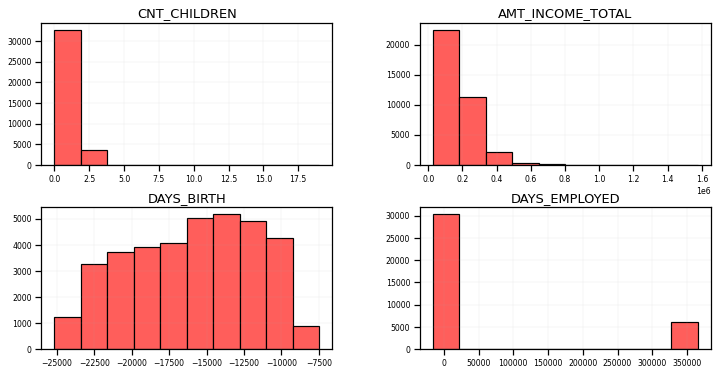

In [270]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,                                       
    "figure.autolayout":True})
                
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

plt.figure(figsize=(10,10))

cols_to_plot = ["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
df_app_cred[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

**3.1.3 Analysis of the distribution of the variables "Type of Income" and "Family Situation".**

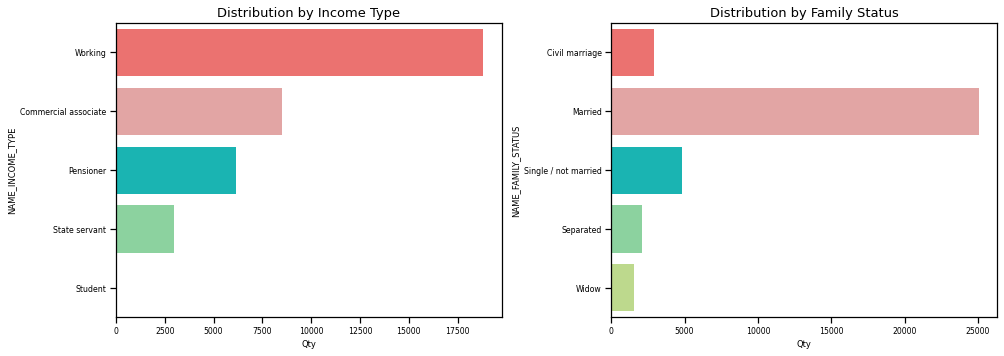

In [271]:
fig, axes = plt.subplots(1,2)

v1=sns.countplot(y=df_app_cred.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
v1.set_title("Distribution by Income Type")
v1.set_xlabel("Qty")

v2=sns.countplot(y=df_app_cred.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
v2.set_title("Distribution by Family Status")
v2.set_xlabel("Qty")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()


**3.1.4 Analysis of the distribution of the variables "Type of Housing" and "Educational Level".**

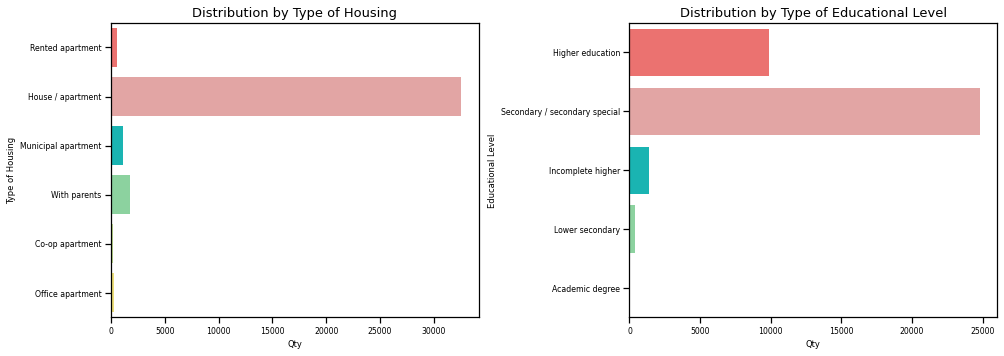

In [272]:
fig, axes = plt.subplots(1,2)

v1= sns.countplot(y=df_app_cred.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
v1.set_title("Distribution by Type of Housing")
v1.set_xlabel("Qty")
v1.set_ylabel("Type of Housing")

v2= sns.countplot(y=df_app_cred.NAME_EDUCATION_TYPE, ax=axes[1])
v2.set_title("Distribution by Type of Educational Level")
v2.set_xlabel("Qty")
v2.set_ylabel("Educational Level")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()


**3.1.5 Analysis of the distribution of the variables "Vehicle Owner" and "Property Owner".**

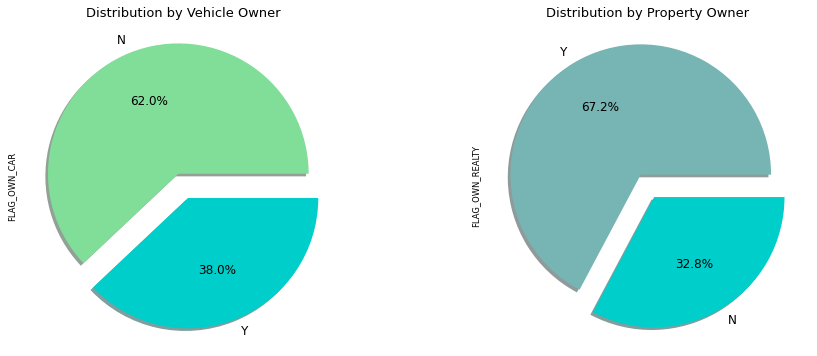

In [273]:
fig, axes = plt.subplots(1,2)

v1= df_app_cred['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[0])
v1.set_title("Distribution by Vehicle Owner")

v2= df_app_cred['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
v2.set_title("Distribution by Property Owner")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()


**3.2 Bivariate / Multivariate Analysis**


**Correlation, considering existing numeric variables** <br>
It is possible to observe a high correlation between the variables "CNT_FAM_MEMBERS" and "CNT_CHILDREN".

<AxesSubplot:>

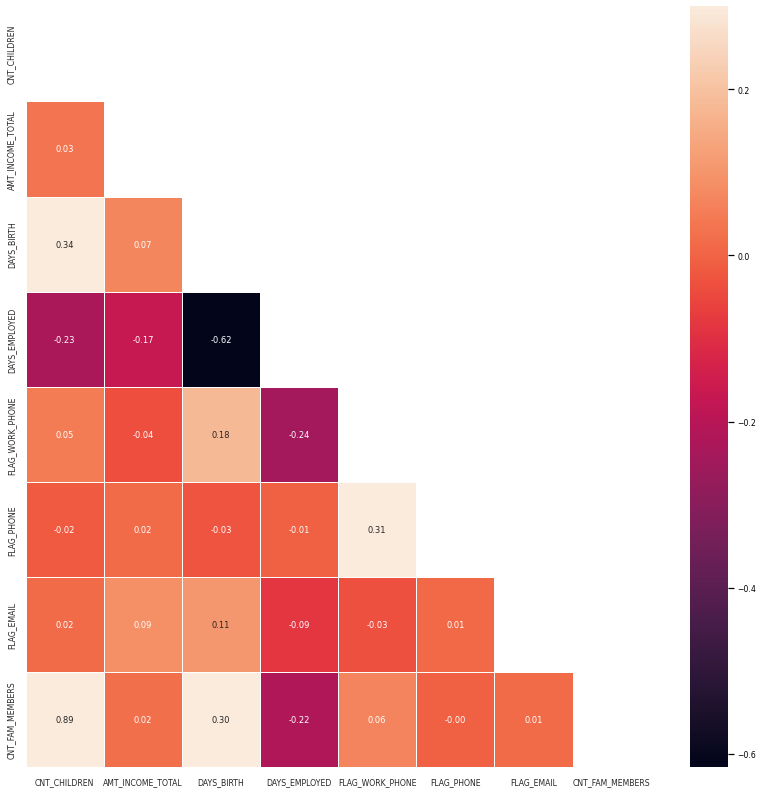

In [274]:
mask = np.zeros_like(df_app_cred.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_app_cred.corr(), annot=True, mask=mask, vmax=.3, linewidths=.5, fmt= '.2f')


**Application of encondig on categorical variables for inclusion in a new correlation analysis.** <br>

In [275]:
#FLAG_OWN_CAR e FLAG_OWN_REALTY
dict_flags = {'N':0, 'Y':1}

df_app_cred['FLAG_OWN_CAR'].value_counts(normalize=True)
df_app_cred['FLAG_OWN_CAR'] = df_app_cred.FLAG_OWN_CAR.map(dict_flags)

df_app_cred['FLAG_OWN_REALTY'].value_counts(normalize=True)
df_app_cred['FLAG_OWN_REALTY'] = df_app_cred.FLAG_OWN_REALTY.map(dict_flags)

In [276]:
df_app_cred.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Indefinido,2.0,X
1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Indefinido,2.0,X
2,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,X
3,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,X
4,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,X


In [277]:
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  int64  
 1   FLAG_OWN_REALTY      36457 non-null  int64  
 2   CNT_CHILDREN         36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_FAMILY_STATUS   36457 non-null  object 
 7   NAME_HOUSING_TYPE    36457 non-null  object 
 8   DAYS_BIRTH           36457 non-null  int64  
 9   DAYS_EMPLOYED        36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  OCCUPATION_TYPE      36457 non-null  object 
 14  CNT_FAM_MEMBERS      36457 non-null  float64
 15  STATUS               36457 non-null 


**New correlation analysis of variables with exclusion of highly correlated variables**

<AxesSubplot:>

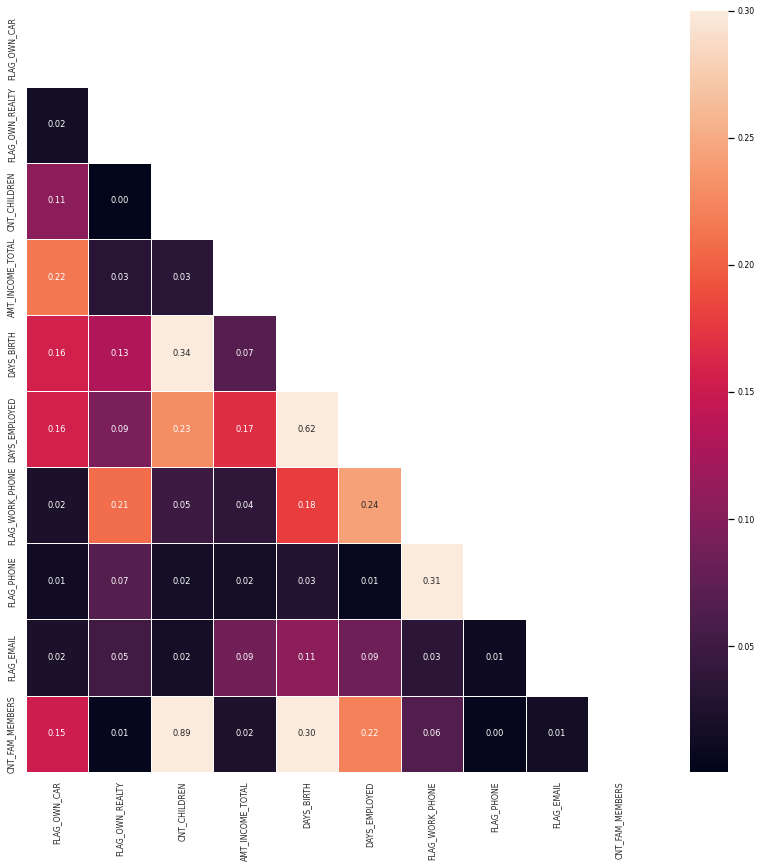

In [278]:
mask = np.zeros_like(df_app_cred.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_app_cred.corr().abs(), annot=True, mask=mask, vmax=.3, linewidths=.5, fmt= '.2f')


In [279]:
matriz_corr = df_app_cred.corr().abs()

Filter matrix upper triangle

In [280]:
tri_superior_matrix = matriz_corr.where(np.triu(np.ones(matriz_corr.shape),k=1).astype(np.bool))

C:\Users\vinic\AppData\Local\Temp\ipykernel_5972\1631368756.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tri_superior_matrix = matriz_corr.where(np.triu(np.ones(matriz_corr.shape),k=1).astype(np.bool))


Identificar colunas que possuem alta correlação (com valor absoluto >= 0.75)

In [281]:
cols_alta_corr = [column for column in tri_superior_matrix.columns if any(tri_superior_matrix[column] > 0.75)]
cols_alta_corr

['CNT_FAM_MEMBERS']


Eliminate columns with high correlation (with absolute value >= 0.75)

In [282]:
df_app_cred.drop(columns=cols_alta_corr, inplace=True)

In [283]:
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  int64  
 1   FLAG_OWN_REALTY      36457 non-null  int64  
 2   CNT_CHILDREN         36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_FAMILY_STATUS   36457 non-null  object 
 7   NAME_HOUSING_TYPE    36457 non-null  object 
 8   DAYS_BIRTH           36457 non-null  int64  
 9   DAYS_EMPLOYED        36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  OCCUPATION_TYPE      36457 non-null  object 
 14  STATUS               36457 non-null  object 
dtypes: float64(1), int64(8), object(6)
m

### 4. Feature engineering

**4.1 Create AGE variable and delete "DAYS_BIRTH" variable**

In [284]:
df_app_cred['AGE'] = -df_app_cred['DAYS_BIRTH']/365.2425
df_app_cred.drop('DAYS_BIRTH', axis=1, inplace=True)

**4.2 Create "EMPLOYED" variable**

In [285]:
df_app_cred['EMPLOYED']=0
df_app_cred.loc[-df_app_cred['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1


**4.3 Create variable with number of years employed and eliminate variable "DAYS_EMPLOYED"**

In [286]:
df_app_cred['YEARS_EMPLOYED']=-df_app_cred['DAYS_EMPLOYED']/365.2425
df_app_cred.loc[df_app_cred['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df_app_cred.drop('DAYS_EMPLOYED', axis=1, inplace=True)

**4.4 Rule definition for Machine Learning Model label**


In the predictive model to be created, our response variable will be defined by the "low" and "high" credit risk categories, created from the "STATUS" variable, being "high" for payments overdue more than 30 days and "low " to the opposite of that.

In [287]:
df_app_cred['STATUS'].value_counts(normalize=True)

X    0.538936
C    0.322544
0    0.117453
1    0.018104
5    0.001317
2    0.001317
3    0.000247
4    0.000082
Name: STATUS, dtype: float64

In [288]:
df_app_cred['STATUS'].replace('X', 0, inplace=True)
df_app_cred['STATUS'].replace('C', 0, inplace=True)
df_app_cred['STATUS'] = df_app_cred['STATUS'].astype(int)

<AxesSubplot:>

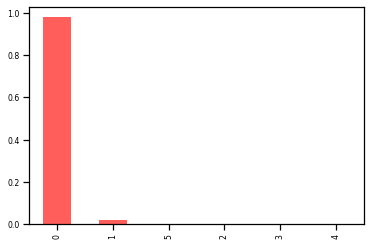

In [289]:
(df_app_cred['STATUS'].value_counts(normalize=True)).plot(kind='bar')

In [290]:
df_app_cred.loc[df_app_cred['STATUS']>=1,'STATUS']=1

<AxesSubplot:>

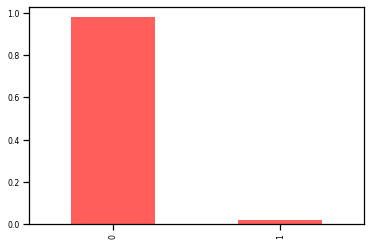

In [291]:
(df_app_cred['STATUS'].value_counts(normalize=True)).plot(kind='bar')


As the base imbalance is clear, when it is necessary to separate the training and test bases, we will have to pay attention to whether the rarer categories are present in the training.

### 5. Preparation for modeling

In [292]:
df_app_cred.drop(['EMPLOYED'], axis=1, inplace=True)

In [293]:
df_app_cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  int64  
 1   FLAG_OWN_REALTY      36457 non-null  int64  
 2   CNT_CHILDREN         36457 non-null  int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  object 
 5   NAME_EDUCATION_TYPE  36457 non-null  object 
 6   NAME_FAMILY_STATUS   36457 non-null  object 
 7   NAME_HOUSING_TYPE    36457 non-null  object 
 8   FLAG_WORK_PHONE      36457 non-null  int64  
 9   FLAG_PHONE           36457 non-null  int64  
 10  FLAG_EMAIL           36457 non-null  int64  
 11  OCCUPATION_TYPE      36457 non-null  object 
 12  STATUS               36457 non-null  int32  
 13  AGE                  36457 non-null  float64
 14  UNEMPLOYED           6135 non-null   float64
 15  YEARS_EMPLOYED       36457 non-null 

In [294]:
df_app_cred['UNEMPLOYED'].fillna(0, inplace=True)
df_app_cred['UNEMPLOYED'].unique()

array([0., 1.])

### 6. Pre-Processing

In [295]:
df_app_cred.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,STATUS,AGE,UNEMPLOYED,YEARS_EMPLOYED
0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Indefinido,0,32.868574,0.0,12.435574
1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Indefinido,0,32.868574,0.0,12.435574
2,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,0,58.793815,0.0,3.104787
3,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,0,52.321403,0.0,8.353354
4,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,0,52.321403,0.0,8.353354


In [296]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [297]:
X_dict_train = df_app_cred
X_dict_train.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,STATUS,AGE,UNEMPLOYED,YEARS_EMPLOYED
0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Indefinido,0,32.868574,0.0,12.435574
1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Indefinido,0,32.868574,0.0,12.435574
2,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,0,58.793815,0.0,3.104787
3,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,0,52.321403,0.0,8.353354
4,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,0,52.321403,0.0,8.353354


In [298]:
le = LabelEncoder()

y = le.fit_transform(df_app_cred["STATUS"])

print(df_app_cred["STATUS"].value_counts())
print("\nLabels:\n", y)

0    35689
1      768
Name: STATUS, dtype: int64

Labels:
 [0 0 0 ... 0 1 1]


In [299]:
X_dict_train.drop(['STATUS'], axis=1, inplace=True)
X_dict_train = X_dict_train.T.to_dict().values()
#print("Atributos:", X_dict_train)

In [300]:
vect = DictVectorizer(sparse=False)   

X = vect.fit_transform(X_dict_train)

# Exibe a estrutura do dado convertido em binário.
#print("Shape do dado de treinamento apos binarizacao (dummies): {0}".format(X.shape))
#print("Treino:\n", X)

In [301]:
#Particionando a Base Treino/Teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30)


### 7. Machine Learning Modeling


**7.1 Decision Tree**

In [312]:
#Treinando Algoritmo - GINI:

tree_credit = DecisionTreeClassifier(random_state=0, criterion='gini')

tree_credit = tree_credit.fit(X_train, y_train)

y_pred = tree_credit.predict(X_test)

print("Accuracy (training base):", tree_credit.score(X_train, y_train))
print("\nAccuracy (test base):", accuracy_score(y_test, y_pred))


Accuracy (training base): 0.985618558720953

Accuracy (test base): 0.9760468092887182


In [320]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["No debtor", "Debtor" ], columns=["No debtor (Expected)", "Debtor (Expected)"])
print(cnf_table)

           No debtor (Expected)  Debtor (Expected)
No debtor                 10706                  3
Debtor                      225                  4


In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10709
           1       0.35      0.17      0.23       229

    accuracy                           0.98     10938
   macro avg       0.67      0.58      0.61     10938
weighted avg       0.97      0.98      0.97     10938



**7.1.1 Pruning Analysis**

In [319]:
tree_credit = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_split=30, min_samples_leaf=10)

tree_credit = tree_credit.fit(X_train, y_train)

y_pred = tree_credit.predict(X_test)

print("Accuracy (training base):", tree_credit.score(X_train, y_train))
print("\nAccuracy (test base):", accuracy_score(y_test, y_pred))

Accuracy (training base): 0.9789568556761629

Accuracy (test base): 0.9791552386176632


In [321]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["No debtor", "Debtor" ], columns=["No debtor (Expected)", "Debtor (Expected)"])
print(cnf_table)

           No debtor (Expected)  Debtor (Expected)
No debtor                 10706                  3
Debtor                      225                  4


In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.57      0.02      0.03       229

    accuracy                           0.98     10938
   macro avg       0.78      0.51      0.51     10938
weighted avg       0.97      0.98      0.97     10938



**7.2 Analysis of other models to increase Debtor Recall**

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [309]:
models = {}
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['svm'] = SVC()
models['bayes'] = GaussianNB()
models['rdm'] = RandomForestClassifier()
models['lgc'] = LogisticRegression(max_iter=1000)
models['ada'] = AdaBoostClassifier()
models['gda'] = GradientBoostingClassifier()
models['bca'] = BaggingClassifier()

In [310]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(name, accuracy)

knn 0.9791552386176632
cart 0.9767782044249406
svm 0.9790638142256354
bayes 0.9786066922654965
rdm 0.9778752971292741
lgc 0.9790638142256354
ada 0.9790638142256354
gda 0.978332419089413
bca 0.9772353263850796


In [311]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    classification = classification_report(y_test,y_pred)
    print(name, classification)

knn               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.51      0.10      0.16       229

    accuracy                           0.98     10938
   macro avg       0.75      0.55      0.58     10938
weighted avg       0.97      0.98      0.97     10938

cart               precision    recall  f1-score   support

           0       0.98      0.99      0.99     10709
           1       0.38      0.18      0.24       229

    accuracy                           0.98     10938
   macro avg       0.68      0.59      0.62     10938
weighted avg       0.97      0.98      0.97     10938



C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

svm               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.00      0.00      0.00       229

    accuracy                           0.98     10938
   macro avg       0.49      0.50      0.49     10938
weighted avg       0.96      0.98      0.97     10938

bayes               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.00      0.00      0.00       229

    accuracy                           0.98     10938
   macro avg       0.49      0.50      0.49     10938
weighted avg       0.96      0.98      0.97     10938

rdm               precision    recall  f1-score   support

           0       0.98      0.99      0.99     10709
           1       0.43      0.18      0.26       229

    accuracy                           0.98     10938
   macro avg       0.71      0.59      0.62     10938
weighted avg       0.97      0.98      0.97     10938



C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

lgc               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.00      0.00      0.00       229

    accuracy                           0.98     10938
   macro avg       0.49      0.50      0.49     10938
weighted avg       0.96      0.98      0.97     10938



C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

ada               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.00      0.00      0.00       229

    accuracy                           0.98     10938
   macro avg       0.49      0.50      0.49     10938
weighted avg       0.96      0.98      0.97     10938

gda               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10709
           1       0.20      0.01      0.02       229

    accuracy                           0.98     10938
   macro avg       0.59      0.51      0.51     10938
weighted avg       0.96      0.98      0.97     10938

bca               precision    recall  f1-score   support

           0       0.98      0.99      0.99     10709
           1       0.39      0.19      0.25       229

    accuracy                           0.98     10938
   macro avg       0.69      0.59      0.62     10938
weighted avg       0.97      0.98      0.97     10938



### 8. Conclusion

A company that provides credit to customers is guaranteed with an internal risk to validate the profile of the customer that remains in default until the debt is paid, determining the cut-off point according to the degree of risk that the company is willing to assume.
Taking into account the risks of no payment, the best parameter to be used for the focus of the classification Machine Learning model is Recall, more specifically, the Recall applied in view of "Debtor" future customers.
Based on our results, we can see that there is a large bias in the database, which is resulting in a Machine Learning model that identifies future No Debtor very well, but has difficulties in classifying Debtors (20% recall).
A notable factor is a large discrepancy between the proportion of no debtors and debtors customers, which makes it difficult to learn the model.
Considering that our unbalanced database, it is necessary to increase the amount of debtor data or reduce the sample size by adjusting the proportionality